# Flower Species Classification using K-Nearest Neighbors (KNN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

## Reading the data in

In [2]:
df = pd.read_csv("iris.csv")

## Understanding the Data

In [3]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Feature set

In [5]:
X = df[['sepal.length' , 'sepal.width' , 'petal.length' , 'petal.width']]
X[0:5]

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y = df['variety'].values


## Normalize Data

In [7]:
scaler = preprocessing.StandardScaler().fit(X) #output mean,sqrt(variance)
X = scaler.transform(X.astype(float)) #Normalization

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


## K nearest neighbor (KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
k = 9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

## Predicting

In [10]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica'],
      dtype=object)

## Accuracy evaluation

In [11]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.975
Test set Accuracy:  0.9333333333333333


## What about other K?

In [14]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
print(std_acc)
# best k=2,4,5,6,7,8,9

[0.9        0.93333333 0.9        0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333]
[0.05477226 0.045542   0.05477226 0.045542   0.045542   0.045542
 0.045542   0.045542   0.045542  ]


## Plot the model accuracy for a different number of neighbors

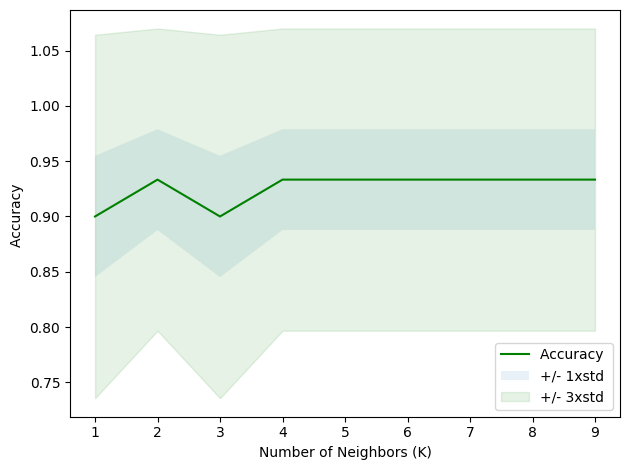

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [17]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9333333333333333 with k= 2


In [18]:
nx = [[ 5.0 , 4.0 , 3.0 , 0.3 ]]
nxs = scaler.transform(nx)
neigh.predict(nxs)

C:\Users\markazico\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Setosa'], dtype=object)